# Intro to Exploratory Data Analysis

Exploring the data is a crucial step before going further into analysis

**Exploratory Data Analysis** - The process of organizing, plotting and summarizing a data set

Serves as a foundation for further analysis. Created by John Tukey

+ EDA often involves summaries. Histograms are a common plot to use for EDA as they're good for observing distributions.

+ While a good, informative plot can sometimes be the end point of an analysis, it is more like a beginning: it helps guide you in the quantitative statistical analyses that come next.

+ If done well, graphical representations can allow for more rapid interpretation of data.

## Plotting a Histogram

Uses `plt.hist()`. Can specify either the edges of the bins or how many bins there are in the histogram

Can also use `Seaborn` as the default plotting style using the following:

`import seaborn as sns`

`sns.set()`

In [1]:
# Loading the Iris dataset
import pandas as pd
# Load the Iris dataset from scikitlearn
from sklearn.datasets import load_iris
iris = load_iris(return_X_y=False)

# Formatting as dataframe
df = pd.DataFrame(iris.data, columns = iris.feature_names)
flowers = list(iris.target_names)
c = list( map(lambda x: flowers[x], iris.target) )
df['species'] = pd.DataFrame(c)

# Creating variable 'versicolor_petal_length'
versicolor_petal_length = df.loc[df['species'] == 'versicolor']
versicolor_petal_length = versicolor_petal_length['petal length (cm)'].tolist()

In [2]:
# Load the Iris dataset from scikitlearn
from sklearn.datasets import load_iris
iris = load_iris(return_X_y=False)
d = iris['data']
versicolor_petal_length = [x[1] for x in d]

# Import plotting modules
import matplotlib.pyplot as plt
import seaborn as sns

# Set default Seaborn style
sns.set()

# Plot histogram of versicolor petal lengths
_ = plt.hist(versicolor_petal_length)

# Show histogram
plt.show()

<Figure size 640x480 with 1 Axes>

### Axis Labels!

+ `plt.xlabel()`

+ `plt.ylabel()`

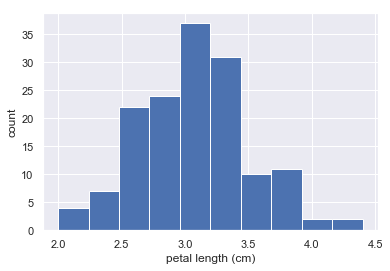

In [3]:
# Import plotting modules
import matplotlib.pyplot as plt
import seaborn as sns

# Set default Seaborn style
sns.set()

# Plot histogram of versicolor petal lengths
_ = plt.hist(versicolor_petal_length)

# Label axes
_ = plt.ylabel("count")
_ = plt.xlabel("petal length (cm)")

# Show histogram
plt.show()

### Specifying Bins

+ The histogram you just made had ten bins. This is the default of matplotlib. 

+ The "square root rule" is a commonly-used rule of thumb for choosing number of bins: choose the number of bins to be the square root of the number of samples. 

+ Plot the histogram of Iris versicolor petal lengths again, this time using the square root rule for the number of bins. 

You specify the number of bins using the `bins` keyword argument of `plt.hist()`.

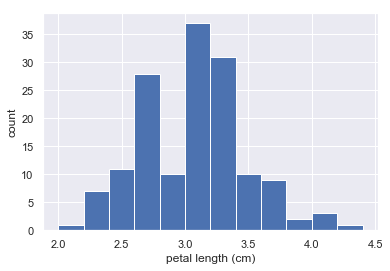

In [4]:
# Import numpy
import numpy as np

# Compute number of data points: n_data
n_data = len(versicolor_petal_length)

# Number of bins is the square root of number of data points: n_bins
n_bins = np.sqrt(n_data)

# Convert number of bins to integer: n_bins
n_bins = int(n_bins)

# Plot the histogram
_ = plt.hist(versicolor_petal_length, bins = n_bins)

# Label axes
_ = plt.xlabel('petal length (cm)')
_ = plt.ylabel('count')

# Show histogram
plt.show()

## Bee Swarm Plots

Problem with histogram is that data looks different depending on how many bins are used and the choice for number of bins is arbitrary

**Binning Bias** - The same data may be interpretted differently depending on choice of bins

Additional problem - The actual data isn't plotted, just grouped. The true values aren't shown

Bee Swarm plots is like a binned scatterplot. It can be created using `seaborn` 

It can be more detailed than the histogram and less complex

```
_ = sns.swarmplot(x='state', y='dem_share', data=df_swing)
_ = plt.xlabel('state')
_ = plt.ylabel('percent of vote for Obama')
plt.show()
```

In [5]:
# Inspect the head of the DataFrame
print(df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  


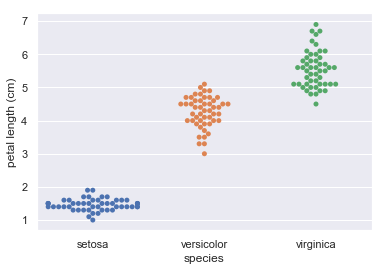

In [6]:
# Create bee swarm plot with Seaborn's default settings
sns.swarmplot(x = "species", y = "petal length (cm)", data = df)

# Label the axes
plt.xlabel("species")
plt.ylabel("petal length (cm)")

# Show the plot
plt.show()

## Plotting All of Your Data: Empirical Cumulative Distribution Function

Though Beeswarm plot is great, there's a limit. If there's too many overlapping data points, then it can be very hard to interpret. 

As an alternative, can compute a **Empirical Cumulative Distribution Function**

Steps for an ECDF function can go like this:

1. Compute number of data points (n)

2. Sort the values of the x-axis

3. Create the y-axis values. It has to be a range of numbers from 1/n to n in equally spaced increments

Can see how to create an ECDF function below

In [7]:
import numpy as np

def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

You will now use your `ecdf()` function to compute the ECDF for the petal lengths of Anderson's Iris versicolor flowers. Then plot them

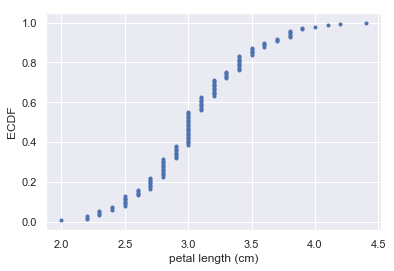

In [8]:
# Compute ECDF for versicolor data: x_vers, y_vers
x_vers, y_vers = ecdf(versicolor_petal_length)

# Generate plot
plt.plot(x_vers, y_vers, marker = '.', linestyle = "none")

# Label the axes
plt.xlabel("petal length (cm)")
plt.ylabel("ECDF")

# Display the plot
plt.show()

ECDFs also allow you to compare two or more distributions (though plots get cluttered if you have too many). Here, you will plot ECDFs for the petal lengths of all three iris species

In [9]:
# Creating petal lengths variables for other two species
setosa_petal_length = df.loc[df['species'] == 'setosa']
setosa_petal_length = setosa_petal_length['petal length (cm)'].tolist()

virginica_petal_length = df.loc[df['species'] == 'virginica']
virginica_petal_length = virginica_petal_length['petal length (cm)'].tolist()

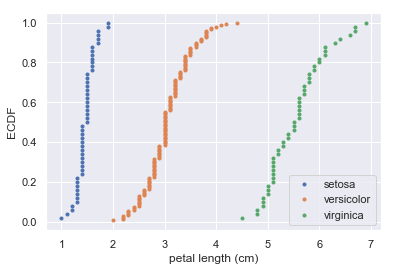

In [10]:
# Compute ECDFs
x_set, y_set = ecdf(setosa_petal_length)
x_vers, y_vers = ecdf(versicolor_petal_length)
x_virg, y_virg = ecdf(virginica_petal_length)

# Plot all ECDFs on the same plot
_ = plt.plot(x_set, y_set, marker = ".", linestyle = "none")
_ = plt.plot(x_vers, y_vers, marker = ".", linestyle = "none")
_ = plt.plot(x_virg, y_virg, marker = ".", linestyle = "none")

# Annotate the plot
plt.legend(('setosa', 'versicolor', 'virginica'), loc='lower right')
_ = plt.xlabel('petal length (cm)')
_ = plt.ylabel('ECDF')

# Display the plot
plt.show()

The ECDFs expose clear differences among the species. Setosa is much shorter, also with less absolute variability in petal length than versicolor and virginica.

# Quantitative exploratory data analysis

Using measures like mean and median

## Introduction to summary statistics: The sample mean and median

These are ways to summarize data numerically, as opposed to graphically as was done above

Measure mean using `np.mean()`

Problem with means is that they're heavily influenced by outliers

The median is the middle value of a dataset, derived by ranking of sorted data and so is immune to extreme outliers

In [11]:
# Compute the mean: mean_length_vers
mean_length_vers = np.mean(versicolor_petal_length)

# Print the result with some nice formatting
print('I. versicolor:', mean_length_vers, 'cm')

I. versicolor: 3.0573333333333337 cm


## Precentiles, outliers and boxplots

Median is the 50th percentile - 50% of the data are less than the median

Can compute percentiles with `np.percentile()` functions

Below, the 2.5th, 25th, 50th, 75th and 97.5th percentiles are to be computed

In [12]:
# Specify array of percentiles: percentiles
percentiles = np.array([2.5, 25, 50, 75, 97.5])

# Compute percentiles: ptiles_vers
ptiles_vers = np.percentile(versicolor_petal_length, percentiles)

# Print the result
print(ptiles_vers)

[2.2725 2.8    3.     3.3    3.9275]


### Comparing percentiles to ECDF

To see how the percentiles relate to the ECDF, you will plot the percentiles of Iris versicolor petal lengths on the ECDF plot

Note that to ensure the Y-axis of the ECDF plot remains between 0 and 1, you will need to rescale the percentiles array accordingly - in this case, dividing it by 100.

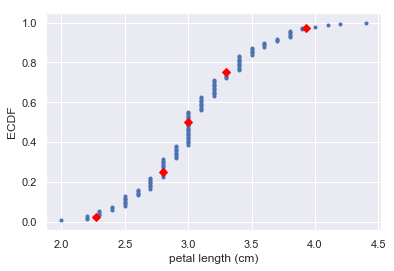

In [13]:
# Plot the ECDF
_ = plt.plot(x_vers, y_vers, '.')
_ = plt.xlabel('petal length (cm)')
_ = plt.ylabel('ECDF')

# Overlay percentiles as red diamonds.
_ = plt.plot(ptiles_vers, percentiles/100, marker='D', color='red',
         linestyle='none')

# Show the plot
plt.show()

### Box-and-whisker plot

Making a box plot for the petal lengths is unnecessary because the iris data set is not too large and the bee swarm plot works fine. However, it is always good to get some practice

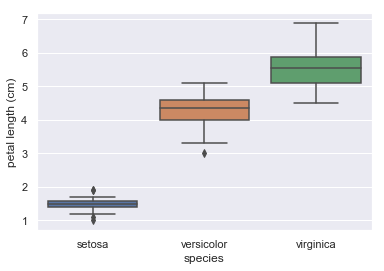

In [14]:
# Create box plot with Seaborn's default settings
_ = sns.boxplot(x = "species", y = "petal length (cm)", data = df)

# Label the axes
_ = plt.xlabel("species")
_ = plt.ylabel("petal length (cm)")

# Show the plot
plt.show()

## Variance and Standard Deviation

The variability or "spread" of the data. 

**Variance** - Average of the squared distance from the mean

To measure variance, take the value of each point and subtract it from the mean, square it, then take the average of all of those values.

$$ variance = \frac{1}{n} \sum{(x_i - \bar{x} )^2} $$

Can calculate it with `np.var()`

Due to the squaring, variance doesn't have the same units as what is being measured. Instead, you want to use square root of variance, the standard deviation

Calculated with `np.std()`

### Computing the variance

It is important to have some understanding of what commonly-used functions are doing under the hood. Below is using `np.var()` function and going through all the necessary calculations for variance step-by-step

In [15]:
# Array of differences to mean: differences
differences = versicolor_petal_length - np.mean(versicolor_petal_length)

# Square the differences: diff_sq
diff_sq = differences ** 2

# Compute the mean square difference: variance_explicit
variance_explicit = np.mean(diff_sq)

# Compute the variance using NumPy: variance_np
variance_np = np.var(versicolor_petal_length)

# Print the results
print(variance_explicit, variance_np)

0.1887128888888889 0.1887128888888889


Now here's the standard deviation

In [16]:
# Compute the variance: variance
variance = np.var(versicolor_petal_length)

# Print the square root of the variance
print(np.sqrt(variance))

# Print the standard deviation
print(np.std(versicolor_petal_length))

0.4344109677354946
0.4344109677354946


## Covariance and Pearson Correlation Coefficient

**Covariance** - A measure of how two quantities vary together

It's measured by taking a single data point subtracting its' x value from mean of x, and subtracting its' y value form the mean of y

$$ covariance = \frac{1}{n} \sum_{i=1}^n (x_i - \bar{x})(y_i - \bar{y}) $$

Essentially, it's measuring if the values of x and y vary together in the same direction

However, we want a more generally applicable measurement on how two variables depend on each other and we want it to be dimensionless (to not have any units)

**Pearson Correlation**

$$ \rho_{x,y} = \text{Pearson correlation} = \frac{\text{covariance}}{(\sigma_x)(\sigma_y)} $$

$$ \rho_{x,y} = \text{Pearson correlation} = \frac{\text{variability due to codependence}}{\text{independent variability}} $$

Pearson correlation is equal to the covariance of x & y dividied by the product of standard deviation of x and standard deviation of y

When you made bee swarm plots, box plots, and ECDF plots in previous exercises, you compared the petal lengths of different species of iris. But what if you want to compare two properties of a single species? This is exactly what we will do in this exercise. We will make a scatter plot of the petal length and width measurements of Anderson's Iris versicolor flowers. If the flower scales (that is, it preserves its proportion as it grows), we would expect the length and width to be correlated.

In [17]:
# Setting the appropriate variables
versicolor_petal_width = df.loc[df['species'] == 'versicolor']
versicolor_petal_width = versicolor_petal_width['petal width (cm)'].tolist()

versicolor_petal_length = df.loc[df['species'] == 'versicolor']
versicolor_petal_length = versicolor_petal_length['petal length (cm)'].tolist()

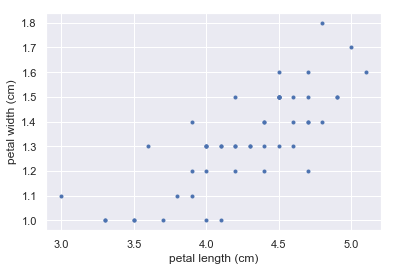

In [18]:
# Make a scatter plot
_ = plt.plot(versicolor_petal_length, versicolor_petal_width, marker = '.', linestyle = 'none')

# Label the axes
_ = plt.xlabel("petal length (cm)")
_ = plt.ylabel("petal width (cm)")

# Show the result
plt.show()

### Computing covariance

The covariance may be computed using the Numpy function `np.cov()`

`np.cov(x, y)` returns a 2D array where entries [0,1] and [1,0] are the covariances. Entry [0,0] is the variance of the data in x, and entry [1,1] is the variance of the data in y. This 2D output array is called the covariance matrix, since it organizes the self- and covariance.

In [19]:
# Compute the covariance matrix: covariance_matrix
covariance_matrix = np.cov(versicolor_petal_length, versicolor_petal_width)

# Print covariance matrix
print(covariance_matrix)

# Extract covariance of length and width of petals: petal_cov
petal_cov = covariance_matrix[0,1]

# Print the length/width covariance
print(petal_cov)

[[0.22081633 0.07310204]
 [0.07310204 0.03910612]]
0.07310204081632653


### Computing the Pearson correlation coefficient

The Pearson correlation coefficient, also called the Pearson r, is often easier to interpret than the covariance. It is computed using the `np.corrcoef()` function. Like `np.cov()`, it takes two arrays as arguments and returns a 2D array. Entries [0,0] and [1,1] are necessarily equal to 1, and the value we are after is entry [0,1].

In this exercise, you will write a function, pearson_r(x, y) that takes in two arrays and returns the Pearson correlation coefficient. 

In [20]:
def pearson_r(x, y):
    """Compute Pearson correlation coefficient between two arrays."""
    # Compute correlation matrix: corr_mat
    corr_mat = np.corrcoef(x,y)

    # Return entry [0,1]
    return corr_mat[0,1]

# Compute Pearson correlation coefficient for I. versicolor: r
r = pearson_r(versicolor_petal_length, versicolor_petal_width)

# Print the result
print(r)

0.7866680885228169


# Probabilistic logic and statistical inference

Probabalistic reasoning allows us to describe uncertainty

ex: If you take 50 of a certain type of flower and measure petal length, you can get a ECDF graph and a mean. If you take another sample of 50, you'll get a different mean and similar (but not the same) ECDF. If we want to get a mean of petal length for all flowers of this type on the planet, this approach doesn't work

Though we can't tell what the next sample would be, we can say it's probable to be close to one of our measurements


**The Heart of Statistical Inference**

Probablistic Thinking - Given a set of data, you describe, probabalistically, what you might expect if those data were acquired again and again and again...

**Goal of Statistical Inference**

Statistical inference involves taking your data to probabilistic conclusions about what you would expect if you took even more data, and you can make decisions based on these conclusions.

* Draw probabilistic conclusions about what we might expect if we collected the same data again.

* To draw more general conclusions from relatively few data or observations.

* Draw actionable conclusions from the data

**Why do we use the language of probability?** 

* We need probability to say how data might vary if acquired again.

* Probability is a measure of uncertainty, and this is crucial because we can quantify what we might expect if the data were acquired again.

* Probabilistic language is in fact very precise. It precisely describes uncertainty.

## Random number generators and hacker statistics

**Hacker Statistics** - Simulate data/event and analyze it

Hacker Stats Probabilities:

* Determine how to simulate your data 

* Simulate many many times

* Probability is approximately fraction of trials with outcome of interest

**Bernoulli Trial** - An experiment that has two options: "Success" (True) and "Failure" (False)

Great way to use hacker statistics is using a random number generator (setting a seed value) and evaluating it with a condition

ex: Simulate a series of coin flips

* Generate a series of numbers between 0 and 1

* If the number is >=0.5 it's a heads

* If number is <0.5, it's tails

* Use functions `np.random.random(size=n)`, `np.random.seed()`, and then evaluate the array created using something like `rand_array >= 0.5`

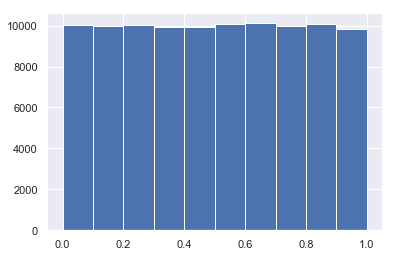

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

# Seed the random number generator
np.random.seed(42)

# Initialize random numbers: random_numbers
random_numbers = np.empty(100000)

# Generate random numbers by looping over range(100000)
for i in range(100000):
    random_numbers[i] = np.random.random()

# Plot a histogram
_ = plt.hist(random_numbers)

# Show the plot
plt.show()

You can think of a Bernoulli trial as a flip of a possibly biased coin. Specifically, each coin flip has a probability `p` of landing heads (success) and probability `1−p` of landing tails (failure). 

Below is a function to simulate Bernoulli trial with coin flips

In [22]:
def perform_bernoulli_trials(n, p):
    """Perform n Bernoulli trials with success probability p
    and return number of successes."""
    # Initialize number of successes: n_success
    n_success = 0

    # Perform trials
    for i in range(n):
        # Choose random number between zero and one: random_number
        random_number = np.random.random()


        # If less than p, it's a success so add one to n_success
        if random_number < p:
            n_success += 1

    return n_success

Below the function is used. Note that the `plt.hist()` function passes the argument `normed` to indicate this data is probability

/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


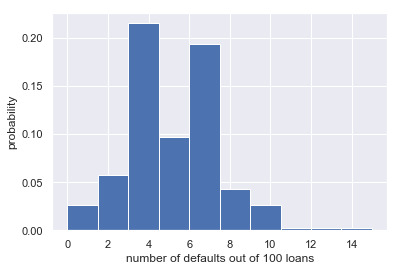

In [23]:
# Seed random number generator
np.random.seed(42)

# Initialize the number of defaults: n_defaults
n_defaults = np.empty(1000)

# Compute the number of defaults
for i in range(1000):
    n_defaults[i] = perform_bernoulli_trials(100, 0.05)


# Plot the histogram with default number of bins; label your axes
_ = plt.hist(n_defaults, normed = True)
_ = plt.xlabel('number of defaults out of 100 loans')
_ = plt.ylabel('probability')

# Show the plot
plt.show()

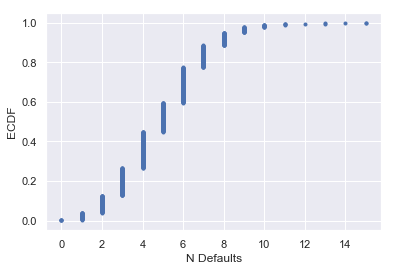

Probability of losing money = 0.022


In [24]:
# Compute ECDF: x, y
x,y = ecdf(n_defaults)

# Plot the ECDF with labeled axes
_ = plt.plot(x,y, marker = '.', linestyle = 'none')
_ = plt.xlabel("N Defaults")
_ = plt.ylabel("ECDF")


# Show the plot
plt.show()

# Compute the number of 100-loan simulations with 10 or more defaults: n_lose_money
n_lose_money = np.sum(n_defaults >= 10)

# Compute and print probability of losing money
print('Probability of losing money =', n_lose_money / len(n_defaults))


## Probability Distributions and Stories

**Proability Mass Function** - A set of probabilities of discrete outcomes. 

ex: For a die roll, outcomes are discrete because there are only discrete values (1-6) that can be obtained. The PMF in this case is called a **Discrete Uniform PMF** because all outcomes are equally likely

PMF is a property of a discrete probability distribution

**Distribution** - Mathematical description of outcomes

Binomial Distribution for coin flips:

* The numer *r* of successes in *n* Bernoulli trials with probability *p* of success, is Binomially distributed

* The number *r* of heads in 4 coin clips with probability 0.5 of heads, is Binomially distributed

The function `np.random.binomial(n,p, size = x)`

* n - number of trials

* p - probability of success 

* size - how many random numbers to sample out of the binomial distribution

Below:

Compute the probability mass function for the number of defaults we would expect for 100 loans as in the last section, but instead of simulating all of the Bernoulli trials, perform the sampling using `np.random.binomial()`. This is identical to the calculation you did in the last set of exercises using your custom-written `perform_bernoulli_trials()` function, but far more computationally efficient.

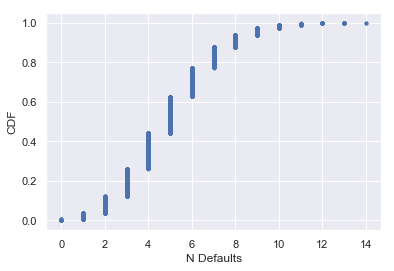

In [25]:
import numpy as np

np.random.seed(42)

# Take 10,000 samples out of the binomial distribution: n_defaults
n_defaults = np.random.binomial(n = 100, p = 0.05, size = 10000)

# Compute CDF: x, y
x, y = ecdf(n_defaults)

# Plot the CDF with axis labels
_ = plt.plot(x,y, marker = '.', linestyle = 'none')
_ = plt.xlabel("N Defaults")
_ = plt.ylabel("CDF")

# Show the plot
plt.show()

Plotting the Binomial PMF

Plotting a nice looking PMF requires a bit of matplotlib trickery that we will not go into here. Instead, we will plot the PMF of the Binomial distribution as a histogram with skills you have already learned. The trick is setting up the edges of the bins to pass to `plt.hist()` via the `bins` keyword argument. We want the bins centered on the integers. So, the edges of the bins should be `-0.5, 0.5, 1.5, 2.5`, ... up to `max(n_defaults) + 1.5`. You can generate an array like this using `np.arange()` and then subtracting 0.5 from the array.

/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


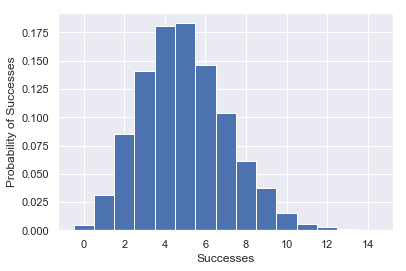

In [26]:
# Compute bin edges: bins
bins = np.arange(0, max(n_defaults) + 1.5) - 0.5

# Generate histogram
_ = plt.hist(n_defaults, bins = bins, normed = True)

# Label axes
_ = plt.xlabel("Successes")
_ = plt.ylabel("Probability of Successes")

# Show the plot
plt.show()

## Poisson processes and the Poisson distribution

**Poisson Process** - The timing of the next event is completely independent of when the previous event occurred

ex: In "Poisson"ville, the bus schedule is erratic. After one bus leaves the next one may come immediately after or may take hours

Examples of Poisson Processes:

* Natural births in a given hospital

* Hits on a website

* Meteor strikes

* Aviating incidents

The number of arrivals in a Poisson process is Poisson distributed

---

**Poisson Distribution**

* Only has 1 parameter: The average amount of arrivals in a given length of time

    + The number `r` of arrivals of a Poisson process in a given time interval with average rate of $ \lambda $ arrivals per interval is Poisson distributed
    
    + ex: The number `r` of *hits on a website* in *one hour* with an average hit rate of *6 hits per hour* is Poisson distributed
    
* The Poisson Distribution is a limit of the binomial distribution for low probability of success and large number of Bernoulli trials (i.e. rare events)

    + Like a special instance of binomial distribution for sporadic/rare events. Think about it, it also has only two possible outcomes, arrive/occurred or didn't

Ex: 

Say we do a Bernoulli trial every minute for an hour, each with a success probability of 0.1. We would do 60 trials, and the number of successes is Binomially distributed, and we would expect to get about 6 successes. This is just like the Poisson story where we get on average 6 hits on a website per hour. So, the Poisson distribution with arrival rate equal to `n*p` approximates a Binomial distribution for `n` Bernoulli trials with probability `p` of success (with `n` large and `p` small). Importantly, the Poisson distribution is often simpler to work with because it has only one parameter instead of two for the Binomial distribution.

---

To sample from the Poisson Distribution, use `np.random.poisson()`

* First argument is `r`, AVERAGE number of events that have occurred (births, buses arrived etc.)

* Can give a second keyword argument `size` to indicate number of trials to perform

In [27]:
# Draw 10,000 samples out of Poisson distribution: samples_poisson
# The sample has a mean of 10, 10 events occurred in a unit of time
samples_poisson = np.random.poisson(10, size = 10000)

# Print the mean and standard deviation
print('Poisson:     ', np.mean(samples_poisson),
                       np.std(samples_poisson))

# Specify values of n and p to consider for Binomial: n, p
# Choose n & p to compare to Poisson distribution. n*p should equal 10
n = [20, 100, 1000]
p = [0.5, 0.1, 0.01]

# Draw 10,000 samples for each n,p pair: samples_binomial
for i in range(3):
    samples_binomial = np.random.binomial(n[i], p[i], size = 10000)

    # Print results
    print('n =', n[i], 'Binom:', np.mean(samples_binomial),
                                 np.std(samples_binomial))

Poisson:      9.9732 3.1276319732347027
n = 20 Binom: 9.9999 2.243858282066851
n = 100 Binom: 9.9957 2.998346462635698
n = 1000 Binom: 9.997 3.124162447761


The means are all about the same, which can be shown to be true by doing some pen-and-paper work. The standard deviation of the Binomial distribution gets closer and closer to that of the Poisson distribution as the probability p gets lower and lower.

---


Another example of Poisson Process

Number of no-hitters in a baseball season

This is a rare event, and since the beginning of the so-called modern era of baseball (starting in 1901), there have only been 251 of them through the 2015 season in over 200,000 games. 

When we have rare events (low p, high n), the Binomial distribution is Poisson. This has a single parameter, the mean number of successes per time interval, in our case the mean number of no-hitters per season.

1990 and 2015 featured the most no-hitters of any season of baseball (there were seven). Given that there are on average 251/115 no-hitters per season, what is the probability of having seven or more in a season?

In [28]:
# Draw 10,000 samples out of Poisson distribution: n_nohitters
n_nohitters = np.random.poisson(251/115, size = 10000)

# Compute number of samples that are seven or greater: n_large
n_large = np.sum(n_nohitters >= 7)

# Compute probability of getting seven or more: p_large
p_large = n_large/10000

# Print the result
print('Probability of seven or more no-hitters:', p_large)

Probability of seven or more no-hitters: 0.0067


The result is about 0.007. This means that it is not that improbable to see a 7-or-more no-hitter season in a century. We have seen two in a century and a half, so it is not unreasonable.

# Thinking probabilistically-- Continuous variables


Continuous Variable - Can take on any value, not just discrete values

They also have a probability distribution

## Probability density functions

**Probability Density Function** - AKA PDF

+ Continuous analog to the PMF

+ Mathematical description of the relative likelihood of observing a value of a continuous variable

Because there's an infinity of numbers between even the closest quantities, it doesn't make sense to describe probability for a single value, but for a range of values that are under the Normal PDF curve

You can also use CDFs to look at probability of an event for a continuous variable. Below is PDF and CDF of the showing speed of light measurements and the probability that a measure would exceed 300000

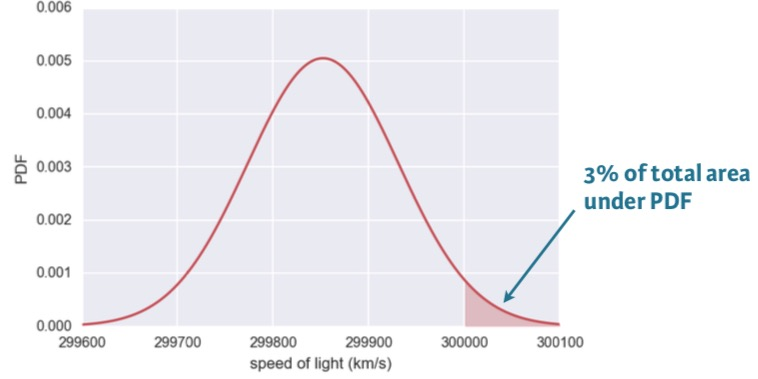

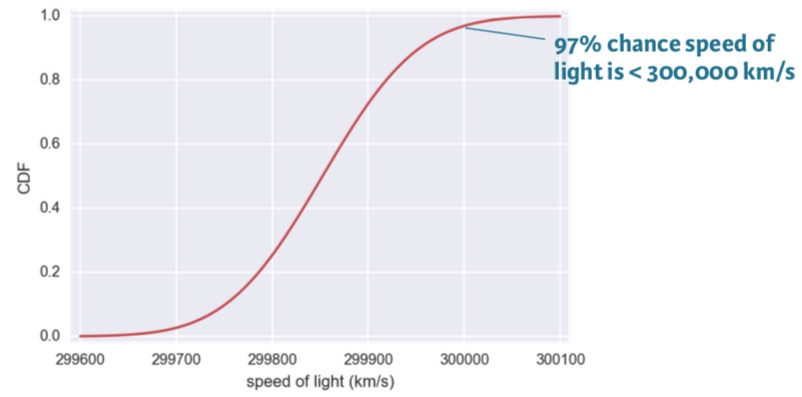

## Intro to the Normal Distribution

Describes a continuous variable whose PDF is symmetric and has a single peak (as shown above)

Has 2 parameters:
1. Mean - Determines where the center of the peak is

2. Standard Deviation - A measure of how wide the peak is, or how spread out the data are

>These are the names of the parameters of the Normal Distribution. They shouldn't be confused with the mean and standard deviation computed directly from the data

The Normal PDF

In this exercise, you will explore the Normal PDF and also learn a way to plot a PDF of a known distribution using hacker statistics. Specifically, you will plot a Normal PDF for various values of the variance.

Also using another `plt.hist()` arg, `histtype = "step"` to make the plot look like smooth theoretical PDF

You can see how the different standard deviations result in PDFs of different widths. The peaks are all centered at the mean of 20.

/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


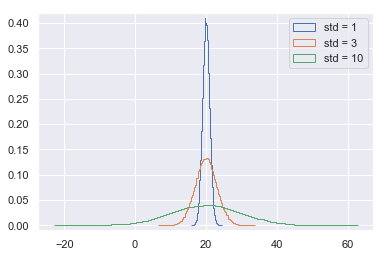

In [29]:
# Draw 100000 samples from Normal distribution with stds of interest: samples_std1, samples_std3, samples_std10
samples_std1 = np.random.normal(20, 1, size = 100000)
samples_std3 = np.random.normal(20, 3, size = 100000)
samples_std10 = np.random.normal(20, 10, size = 100000)

# Make histograms
_ = plt.hist(samples_std1, bins=100, normed = True, histtype = "step")
_ = plt.hist(samples_std3, bins = 100, normed = True, histtype = "step")
_ = plt.hist(samples_std10, bins = 100, normed = True, histtype = "step")

# Make a legend, set limits and show plot
_ = plt.legend(('std = 1', 'std = 3', 'std = 10'))
plt.ylim(-0.01, 0.42)
plt.show()

The Normal CDF

Now that you have a feel for how the Normal PDF looks, let's consider its CDF. 

The CDFs all pass through the mean at the 50th percentile; the mean and median of a Normal distribution are equal. The width of the CDF varies with the standard deviation.

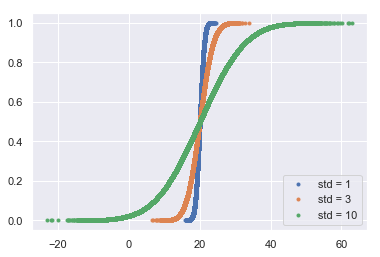

In [30]:
# Generate CDFs
x_std1, y_std1 = ecdf(samples_std1)
x_std3, y_std3 = ecdf(samples_std3)
x_std10, y_std10 = ecdf(samples_std10)

# Plot CDFs
_ = plt.plot(x_std1, y_std1, linestyle = "none", marker = ".")
_ = plt.plot(x_std3, y_std3, linestyle = "none", marker = ".")
_ = plt.plot(x_std10, y_std10, linestyle = "none", marker = ".")

# Make a legend and show the plot
_ = plt.legend(('std = 1', 'std = 3', 'std = 10'), loc='lower right')
plt.show()

### Normal Distribution Properties and Warnings

Below the dataset from `belmont.csv` is used with the years 1970 and 1973 removed for analysis because those years were outliers

In [31]:
# Import belmont data
belmont = pd.read_csv("belmont.csv")

# Take out the two outliers from the data
o1 = belmont.loc[belmont['Year'] == 1970].index[0]
o2 = belmont.loc[belmont['Year'] == 1973].index[0]
outliers = [o1, o2]
belmont_no_outliers = belmont.drop(outliers)
belmont_no_outliers = belmont_no_outliers["Time"].tolist()

# Convert all times to seconds
belmont_no_outliers = [ float(t[0]) * 60 + float(t[2:]) for t in belmont_no_outliers ]

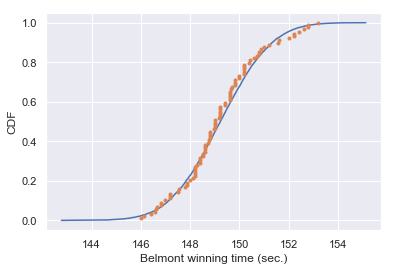

In [32]:
# Compute mean and standard deviation: mu, sigma
mu = np.mean(belmont_no_outliers)
sigma = np.std(belmont_no_outliers)

# Sample out of a normal distribution with this mu and sigma: samples
samples = np.random.normal(mu, sigma, size = 10000)

# Get the CDF of the samples and of the data
x_theor, y_theor = ecdf(samples)
x, y = ecdf(belmont_no_outliers)

# Plot the CDFs and show the plot
_ = plt.plot(x_theor, y_theor)
_ = plt.plot(x, y, marker='.', linestyle='none')
_ = plt.xlabel('Belmont winning time (sec.)')
_ = plt.ylabel('CDF')
plt.show()

The theoretical CDF and the ECDF of the data suggest that the winning Belmont times are, indeed, Normally distributed. This also suggests that in the last 100 years or so, there have not been major technological or training advances that have significantly affected the speed at which horses can run this race.


What are the chances of a horse matching or beating Secretariat's record?

Assume that the Belmont winners' times are Normally distributed (with the 1970 and 1973 years removed), what is the probability that the winner of a given Belmont Stakes will run it as fast or faster than Secretariat?

In [33]:
# Take a million samples out of the Normal distribution: samples
np.random.seed(42)
samples = np.random.normal(mu, sigma, size = 1000000)

# Compute the fraction that are faster than 144 seconds: prob
prob = np.sum(samples <= 144)/len(samples)

# Print the result
print('Probability of besting Secretariat:', prob)

Probability of besting Secretariat: 0.000593


We had to take a million samples because the probability of a fast time is very low and we had to be sure to sample enough. We get that there is only a 0.06% chance of a horse running the Belmont as fast as Secretariat.

## The Exponential Distribution

There are also many names for continuous distributions as there are discrete distributions

In Poissonville, the number of buses that arrive in an hour are Poisson distributed. However, the **AMOUNT OF TIME** between the arrival of buses is exponentially distributed. 

The waiting time between arrivals of a Poisson process is exponentially distributed.
* Has a single parameter, mean waiting time
* It is not peaked

EX:
Unfortunately, Justin was not alive when Secretariat ran the Belmont in 1973. Do you think he will get to see a performance like that? To answer this, you are interested in how many years you would expect to wait until you see another performance like Secretariat's. How is the waiting time until the next performance as good or better than Secretariat's distributed? 

**ANSWER**
Exponential: A horse as fast as Secretariat is a rare event, which can be modeled as a Poisson process, and the waiting time between arrivals of a Poisson process is Exponentially distributed.

---
In earlier exercises, we looked at the rare event of no-hitters in Major League Baseball. Hitting the cycle is another rare baseball event. When a batter hits the cycle, he gets all four kinds of hits, a single, double, triple, and home run, in a single game. Like no-hitters, this can be modeled as a Poisson process, so the time between hits of the cycle are also Exponentially distributed.

How long must we wait to see both a no-hitter and then a batter hit the cycle? The idea is that we have to wait some time for the no-hitter, and then after the no-hitter, we have to wait for hitting the cycle. Stated another way, what is the total waiting time for the arrival of two different Poisson processes? The total waiting time is the time waited for the no-hitter, plus the time waited for the hitting the cycle.

Define a function with call signature 
`successive_poisson(tau1, tau2, size=1)` 
that samples the waiting time for a no-hitter and a hit of the cycle.

In [34]:
def successive_poisson(tau1, tau2, size=1):
    """Compute time for arrival of 2 successive Poisson processes."""
    # Draw samples out of first exponential distribution: t1
    t1 = np.random.exponential(tau1, size)

    # Draw samples out of second exponential distribution: t2
    t2 = np.random.exponential(tau2, size)

    return t1 + t2

Now, you'll use your sampling function to compute the waiting time to observe a no-hitter and hitting of the cycle. 
* The mean waiting time for a no-hitter is 764 games
* The mean waiting time for hitting the cycle is 715 games.

/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


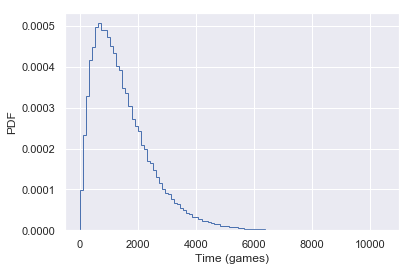

In [35]:
# Draw samples of waiting times: waiting_times
waiting_times = successive_poisson(764, 715, size = 100000)

# Make the histogram
_ = plt.hist(waiting_times, bins = 100, normed = True, histtype="step")


# Label axes
_ = plt.xlabel("Time (games)")
_ = plt.ylabel("PDF")

# Show the plot
plt.show()

Notice that the PDF is peaked, unlike the waiting time for a single Poisson process. For fun (and enlightenment), I encourage you to also plot the CDF.

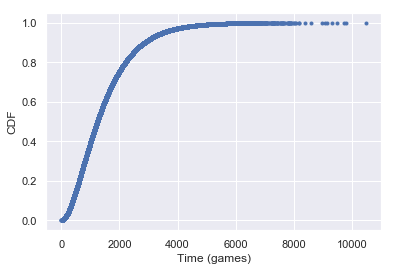

In [36]:
# Get the CDF of the samples and of the data
x_wait, y_wait = ecdf(waiting_times)
_ = plt.plot(x_wait, y_wait, marker='.', linestyle='none')
_ = plt.xlabel("Time (games)")
_ = plt.ylabel("CDF")

plt.show()